In [16]:
# from scipy.misc import imread
from imageio import imread
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
PATH = 'images\images_full\images\\'

In [3]:
listdir(PATH)[:5]

['modified_100136192_case.bmp',
 'modified_100351981_point.bmp',
 'modified_100620761_woman.bmp',
 'modified_102961711_government.bmp',
 'modified_103713876_group.bmp']

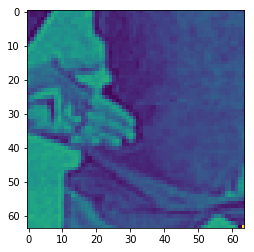

In [4]:
# LET'S LOOK
img = imread(PATH +listdir(PATH)[5])
plt.imshow(img)

In [5]:
img.shape

(64, 64)

In [6]:
# соберем original и modified

In [7]:
files = listdir(PATH)
imgs = []
for file in files:
    if 'original' in file:
        key = file[len('original_'):-len('.bmp')]
#         print(key)
        imgs.append([imread(PATH + file)])
        for file2 in files:
            if (key in file2) and (file != file2):
#                 print(key, file, file2)
                imgs[-1].append(imread(PATH + file2))

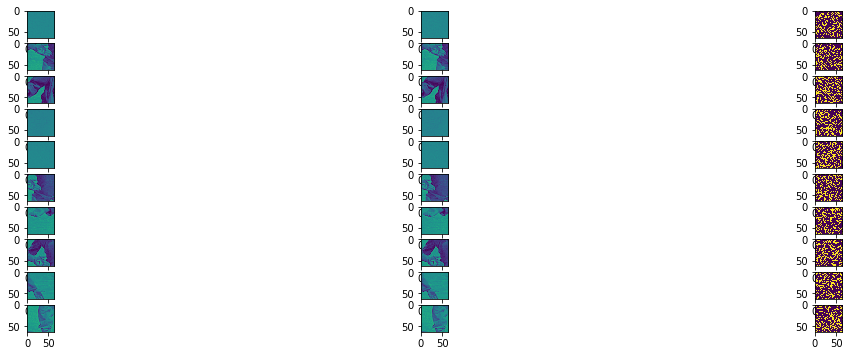

In [12]:
# g1, g2 = plt.subplot(1, 2)
plt.figure(figsize=(20, 60))
for i in range(10):
    plt.subplot(100, 3, 3*i+1)
    plt.imshow(imgs[i][0])

    plt.subplot(100, 3, 3*i + 2)
    plt.imshow(imgs[i][1])

    plt.subplot(100, 3, 3*i + 3)
    plt.imshow(imgs[i][1] - imgs[i][0])

In [24]:
difs = [list((img[1] - img[0]).flatten()) for img in imgs]

In [ ]:
# теперь осталось лишь проверить наличие цикличности для каждого ряда

In [56]:
from statsmodels.tsa.stattools import kpss
kpss(difs[0])

(0.5933035829179854,
 0.023245128825637694,
 31,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [58]:
from statsmodels.stats.diagnostic import acorr_ljungbox
kans = []
for dif in difs:
    min_p = min(acorr_ljungbox(dif)[1])
    min_p = kpss(dif)[1]
    if min_p < 0.1:
        print(min_p)
        kans.append([dif, min_p])

0.023245128825637694
0.02290384511877115
0.03625191855764088


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.09310592744006727


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.06685978761311387
0.014142703791055736


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.03865922901050124
0.011489502747032301
0.0221221987715551


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.09634929931516256


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.05829249043355762
0.052794057497598204
0.06365637137837357


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.02675033011846281
0.016490473368925375
0.032812177006679925


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.022981218574760685
0.0718756093226501
0.037643961039462555


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.07548024069472817
0.018046631368957525
0.016411278999442808


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.09564784344861345
0.06281973390212445
0.01
0.06014976949601188


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.06872789276028277
0.021960455253700707


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.021523796938496407
0.08102832310355088
0.09403575889613945
0.09187680399184192
0.06044258606794723


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.09394047492335963
0.03342857934311805


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.028416186860611054
0.01
0.08712460306862835


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.01703136145714811
0.037680679695831235


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.04509798261633094


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.08384732125820102


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.0626827519940962
0.060309704979022986
0.04444065671273842
0.06176639069683164


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.01
0.018721728461221655


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.046760650962364106


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.01
0.0844155534844834
0.039131909452633666

S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat


0.0844218805584632
0.0665328955120365


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.04017998530703805


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.023803618822150933


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.03490187647310061
0.06538142622343701


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.09133237931236478


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.019666193088512293


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.03421483356267198
0.016582374328241438


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.04358375648575864
0.039818146005598014
0.01


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.01885087306816072
0.04071739122047685


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.06590838971698196
0.07524316675586565


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.032655555849981616
0.0883373243442679


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.0542660102432079
0.019262908981626213


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.09556188666068545
0.08955642837079417
0.015601440134334602


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.05253781286219369
0.0682339982355595
0.01
0.08549951955507039


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.01
0.05213856471572537


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.01
0.08760529049596352
0.046291445968988966


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.07436687777931907
0.0743640895427101


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.06569915286069555
0.07793527072630614


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.04021976145910346
0.010618055641085887
0.09709767756539903


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.0769990096377029
0.043892544281322325


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", Interpolat

0.01


S:\Users\RezyapkinV\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [60]:
kans

[[[255,
   0,
   0,
   0,
   0,
   1,
   254,
   2,
   255,
   255,
   0,
   3,
   255,
   255,
   0,
   0,
   255,
   255,
   1,
   0,
   0,
   0,
   1,
   255,
   255,
   2,
   255,
   0,
   0,
   253,
   255,
   0,
   255,
   3,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   255,
   255,
   0,
   255,
   0,
   0,
   255,
   0,
   255,
   0,
   1,
   0,
   0,
   1,
   255,
   0,
   255,
   0,
   0,
   1,
   0,
   1,
   5,
   255,
   0,
   1,
   253,
   254,
   1,
   0,
   0,
   255,
   2,
   3,
   0,
   255,
   1,
   1,
   255,
   255,
   255,
   3,
   1,
   0,
   255,
   0,
   1,
   254,
   1,
   1,
   255,
   0,
   1,
   0,
   255,
   1,
   0,
   255,
   252,
   0,
   255,
   0,
   254,
   3,
   255,
   255,
   0,
   2,
   1,
   255,
   0,
   255,
   254,
   2,
   0,
   0,
   2,
   0,
   0,
   0,
   255,
   255,
   0,
   255,
   0,
   255,
   0,
   1,
   255,
   0,
   253,
   1,
   254,
   0,
   3,
   0,
   0,
   254,
   1,
   1,
   254,
   255,
   0,
   254,
   0,
   0,
   0,
   2,
